<a href="https://colab.research.google.com/github/junpito/Data_analysis_projects/blob/main/Saham_Freeport_Analisyss_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt



In [40]:

url = 'https://query1.finance.yahoo.com/v7/finance/download/FCX?period1=813024000&period2=1699401600&interval=1d&events=history&includeAdjustedClose=true'
df = pd.read_csv(url)

In [11]:

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1995-10-09,12.4375,12.500,12.3125,12.5000,6.889061,148600
1,1995-10-10,12.5625,12.625,12.5000,12.5625,6.923506,407600
2,1995-10-11,12.6250,12.625,12.4375,12.5625,6.923506,251400
3,1995-10-12,12.5000,12.625,12.4375,12.6250,7.020825,462800
4,1995-10-13,12.6250,13.000,12.6250,12.8125,7.125092,666400


In [12]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
7065,2023-11-01,33.869999,33.990002,33.290001,33.709999,33.709999,9698600
7066,2023-11-02,34.310001,35.130001,34.310001,35.009998,35.009998,9225600
7067,2023-11-03,35.650002,35.990002,35.080002,35.150002,35.150002,9306200
7068,2023-11-06,35.509998,35.599998,35.160000,35.369999,35.369999,7805900
7069,2023-11-07,34.660000,34.689999,33.730000,34.060001,34.060001,12611900


Date: Ini adalah tanggal ketika data saham dicatat.

Open: Ini adalah harga saham saat pasar dibuka pada tanggal tersebut.

High: Ini adalah harga tertinggi yang dicapai saham pada tanggal tersebut.

Low: Ini adalah harga terendah yang dicapai saham pada tanggal tersebut.

Close: Ini adalah harga saham saat pasar ditutup pada tanggal tersebut.

Adj Close: Harga penutupan disesuaikan menggambarkan bahwa harga saham telah disesuaikan untuk pembayaran dividen dan distribusi hak.

Volume: Ini adalah jumlah saham yang diperdagangkan selama hari itu.

In [13]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

##Statisitik descriptive

In [14]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,7070.000000,7070.000000,7070.000000,7070.000000,7070.000000,7.070000e+03
mean,22.646301,23.021753,22.231263,22.628754,17.926674,1.489514e+07
std,14.101897,14.310044,13.849208,14.082617,12.138947,1.444181e+07
min,3.375000,3.500000,3.375000,3.375000,2.014004,8.240000e+04
25%,10.820000,11.092500,10.510000,10.772500,8.321370,2.874800e+06
50%,17.992500,18.257500,17.670000,18.000000,13.258921,1.258830e+07
75%,34.400002,34.878751,33.840000,34.338750,28.663607,2.135392e+07
max,63.000000,63.619999,61.549999,62.930000,50.458778,1.538280e+08


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7070 entries, 0 to 7069
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       7070 non-null   object 
 1   Open       7070 non-null   float64
 2   High       7070 non-null   float64
 3   Low        7070 non-null   float64
 4   Close      7070 non-null   float64
 5   Adj Close  7070 non-null   float64
 6   Volume     7070 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 386.8+ KB


#analisis korelasi

<ipython-input-16-528340381997>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


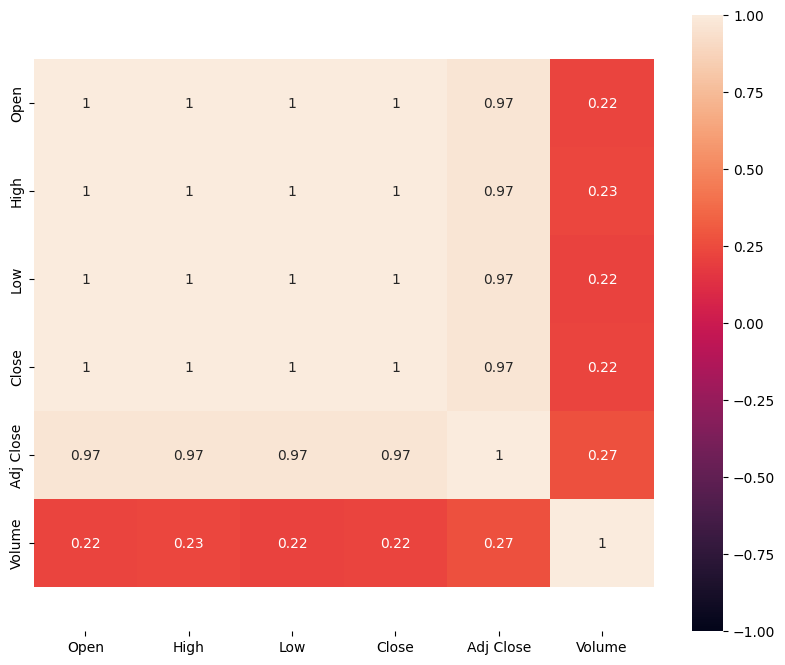

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999628,0.999502,0.999094,0.965706,0.224830
High,0.999628,1.000000,0.999444,0.999567,0.966200,0.231843
Low,0.999502,0.999444,1.000000,0.999605,0.966593,0.216391
Close,0.999094,0.999567,0.999605,1.000000,0.966824,0.224182
Adj Close,0.965706,0.966200,0.966593,0.966824,1.000000,0.271092
Volume,0.224830,0.231843,0.216391,0.224182,0.271092,1.000000


In [16]:
import seaborn as sns
#correlation between the values
corr = df.corr()
plt.figure(figsize=(10, 8))

ax = sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()
corr

Analisis trend

In [53]:
def plot_series(x, y, format="-", start=0, end=None,
                title=None, xlabel=None, ylabel=None, legend=None ):

    # Setup dimensions of the graph figure
    plt.figure(figsize=(10, 6))

    # Check if there are more than two series to plot
    if type(y) is tuple:

      # Loop over the y elements
      for y_curr in y:

        # Plot the x and current y values
        plt.plot(x[start:end], y_curr[start:end], format)

    else:
      # Plot the x and y values
      plt.plot(x[start:end], y[start:end], format)

    # Label the x-axis
    plt.xlabel(xlabel)

    # Label the y-axis
    plt.ylabel(ylabel)

    # Set the legend
    if legend:
      plt.legend(legend)

    # Set the title
    plt.title(title)

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

In [18]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

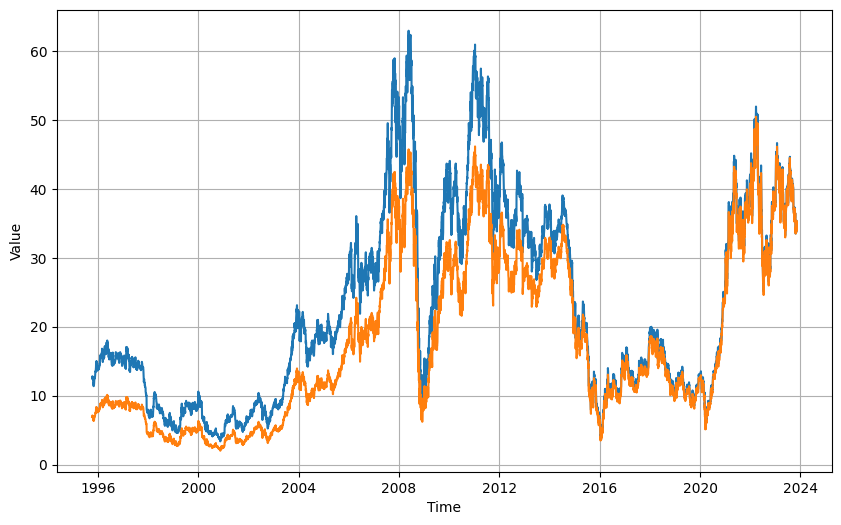

In [19]:
time = df.index
open = df['Open']
high = df['High']
low = df['Low']
close = df['Close']
adj_close = df['Adj Close']

plot_series(time, (close, adj_close))

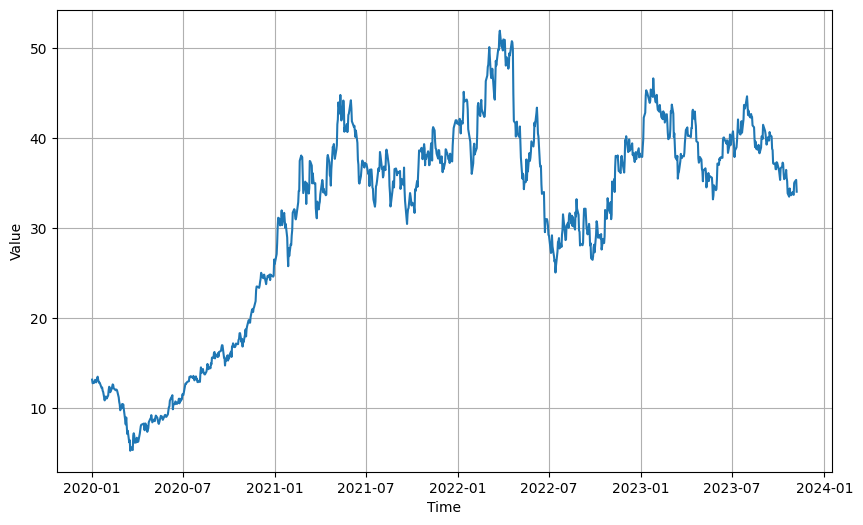

In [20]:
start_date = '2020-01-01'  # Tanggal awal di tahun 2020
end_date = '2023-11-07'   # Tanggal akhir dari DataFrame
series_zoomed = close[start_date:end_date]
plot_series(series_zoomed.index, series_zoomed.values)

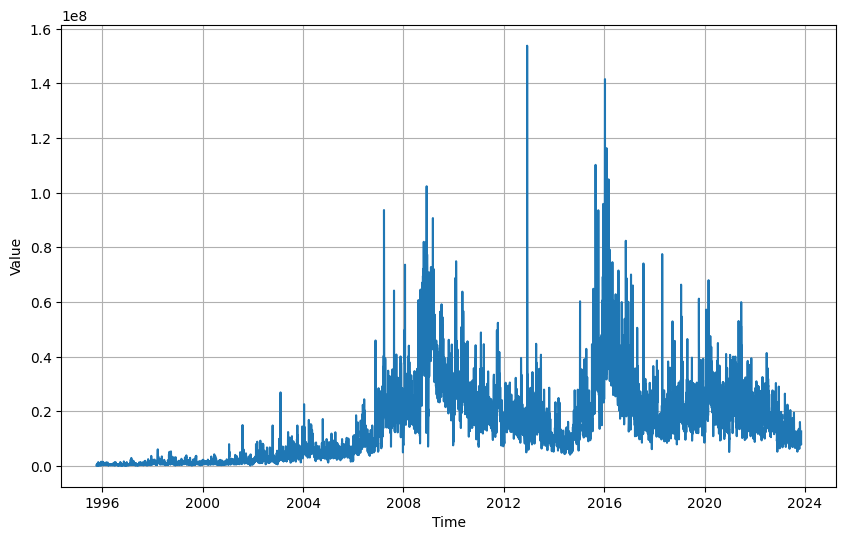

In [21]:
volume = df['Volume']

plot_series(time, volume)

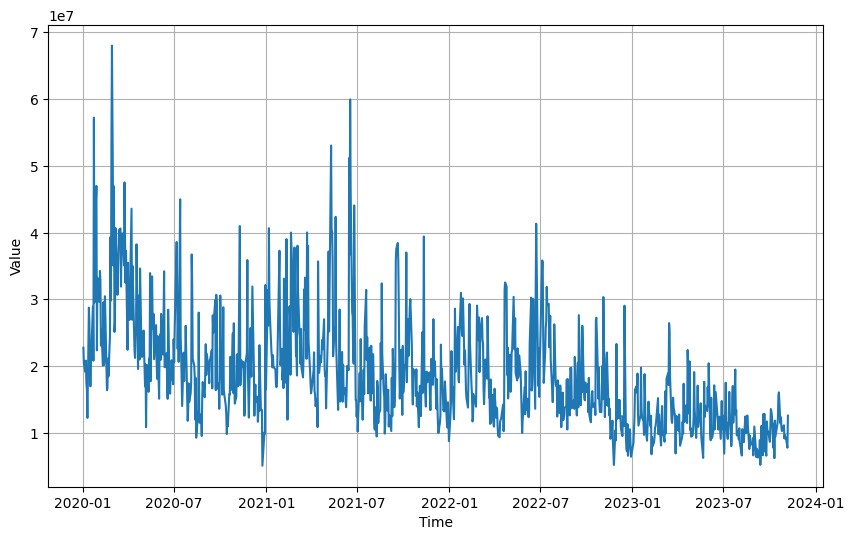

In [22]:
start_date = '2020-01-01'  # Tanggal awal di tahun 2020
end_date = '2023-11-07'   # Tanggal akhir dari DataFrame
series_zoomed = volume[start_date:end_date]
plot_series(series_zoomed.index, series_zoomed.values)

prediksi sederhana menggunakan moving average

In [23]:
def moving_average_forecast(series, window_size):

    # Initialize a list
    forecast = []

    # Compute the moving average based on the window size
    for time in range(len(series) - window_size):
      forecast.append(series[time:time + window_size].mean())

    # Convert to a numpy array
    forecast = np.array(forecast)

    return forecast

moving average ini adalah serangkaian nilai yang mewakili tren umum dari data asli. Itu membantu untuk menghilangkan fluktuasi harian atau noise sehingga pola atau tren jangka panjang dapat lebih mudah diamati.

###MA dengan window size 7 hari

* Respon Cepat Terhadap Perubahan Harian: Dengan window size 7 hari, moving average akan sangat responsif terhadap perubahan harga harian. Hal ini dapat membantu Anda mengidentifikasi tren jangka pendek dengan lebih cepat.

* Cocok untuk Pemantauan Jangka Pendek: Moving average 7 hari cocok untuk pemantauan dan analisis dalam jangka pendek. Jika Anda tertarik untuk melihat tren atau mengambil keputusan perdagangan dalam jangka waktu harian, ini bisa menjadi pilihan yang baik.

* Penting untuk Strategi Trading Korterm: Jika Anda terlibat dalam strategi trading korterm, menggunakan moving average 7 hari dapat memberikan sinyal dan indikasi yang lebih cepat dibandingkan dengan moving average dengan window size yang lebih besar.

* Mengidentifikasi Fluktuasi Kecil: Dengan moving average 7 hari, Anda dapat lebih mudah mengidentifikasi fluktuasi harian yang lebih kecil dan memahami bagaimana harga saham bereaksi terhadap peristiwa sehari-hari.

* Sesuai untuk Pemantauan Volatilitas Harian: Jika Anda ingin memantau volatilitas harian atau mengukur seberapa volatil harga saham dalam jangka pendek, moving average 7 hari akan memberikan informasi yang lebih akurat.

In [24]:
series = df['Close'].values
window_size = 7
forecast = moving_average_forecast(series, window_size)
# Filter indeks waktu berdasarkan rentang tanggal

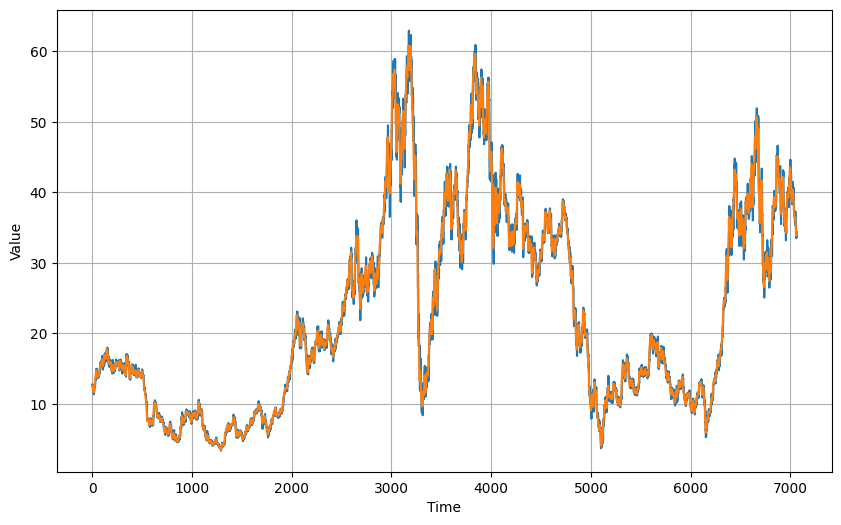

In [25]:
# Menggunakan indeks pada sumbu x
time_indices = np.arange(len(forecast))

# Memplot hasilnya
plot_series(time_indices, (close[:len(forecast)], forecast))


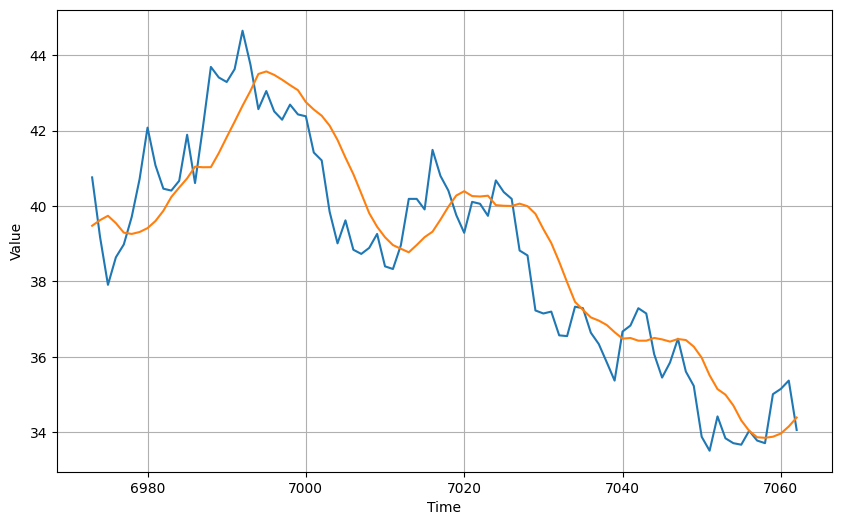

In [26]:
# Menggunakan indeks pada sumbu x
time_indices = np.arange(len(forecast))

# Memplot hasilnya dengan rentang waktu 90 hari terakhir
plot_series(time_indices[-90:], (close[-90:], forecast[-90:]))


In [27]:
# Menghitung MSE
mse = tf.keras.metrics.mean_squared_error(series[window_size:], forecast).numpy()

# Menghitung MAE
mae = tf.keras.metrics.mean_absolute_error(series[window_size:], forecast).numpy()

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 1.601440284738867
Mean Absolute Error (MAE): 0.8336393905665339


###MA dengan window size 30 hari untuk jangka menengah

* Penghalusan Fluktuasi Harian: Dengan window size 30 hari, moving average akan membantu menghaluskan fluktuasi harian harga saham. Ini dapat membantu Anda melihat tren jangka pendek dengan lebih jelas.

* Respon Cepat Terhadap Perubahan: Dibandingkan dengan moving average dengan window size yang lebih besar, moving average 30 hari akan memberikan respons yang lebih cepat terhadap perubahan harga yang signifikan.

* Cocok untuk Pemantauan Jangka Pendek: Jika Anda tertarik untuk memantau tren atau mengambil keputusan perdagangan dalam jangka pendek, menggunakan moving average 30 hari bisa sangat berguna.

* Relevan untuk Strategi Trading Harian: Jika Anda terlibat dalam strategi trading harian, menggunakan moving average 30 hari dapat membantu Anda mengidentifikasi tren atau sinyal perdagangan dalam jangka waktu yang sesuai.

* Memungkinkan Identifikasi Kondisi Overbought dan Oversold: Dengan membandingkan harga saham aktual dengan moving average 30 hari, Anda dapat mengidentifikasi apakah saham sedang dalam kondisi overbought (terlalu mahal) atau oversold (terlalu murah).

* Penting untuk Divergence dan Convergence: Pemotongan (crossover) antara harga saham dan moving average 30 hari dapat memberikan indikasi potensial tentang perubahan tren atau sinyal trading.

* Membantu Menentukan Posisi Entry dan Exit: Moving average 30 hari dapat digunakan sebagai referensi untuk menentukan kapan sebaiknya memasuki atau keluar dari posisi perdagangan.

In [28]:
series = df['Close'].values
window_size = 30
forecast = moving_average_forecast(series, window_size)
# Filter indeks waktu berdasarkan rentang tanggal

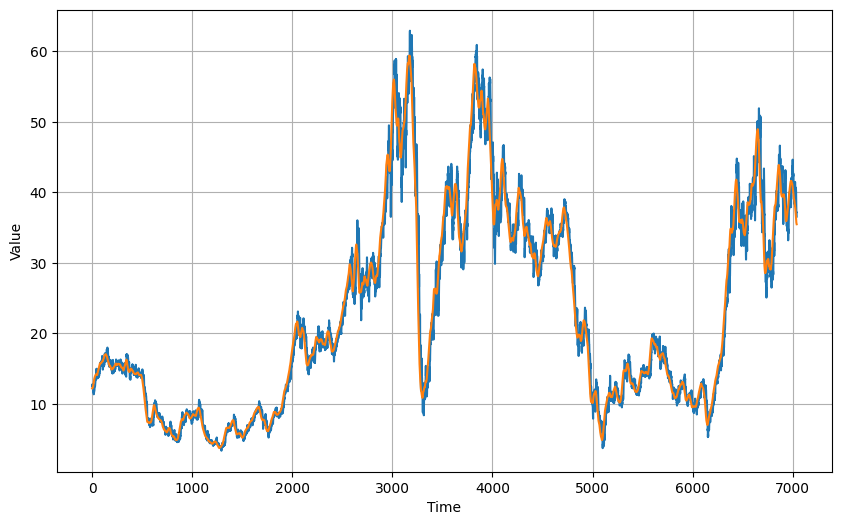

In [29]:
# Menggunakan indeks pada sumbu x
time_indices = np.arange(len(forecast))

# Memplot hasilnya
plot_series(time_indices, (close[:len(forecast)], forecast))

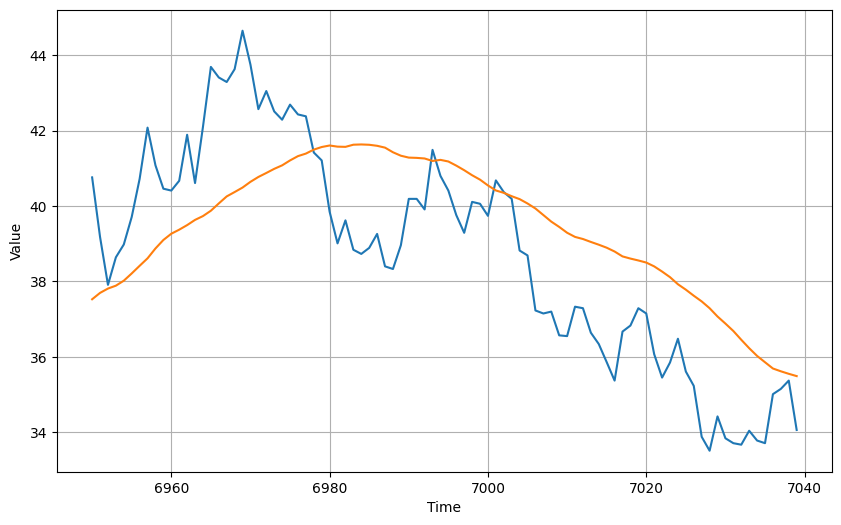

In [30]:
# Menggunakan indeks pada sumbu x
time_indices = np.arange(len(forecast))

# Memplot hasilnya dengan rentang waktu 90 hari terakhir
plot_series(time_indices[-90:], (close[-90:], forecast[-90:]))

In [31]:
# Menghitung MSE
mse = tf.keras.metrics.mean_squared_error(series[window_size:], forecast).numpy()

# Menghitung MAE
mae = tf.keras.metrics.mean_absolute_error(series[window_size:], forecast).numpy()

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 5.750742043486078
Mean Absolute Error (MAE): 1.6349570899242425


### MA dengan window 100 hari untuk jangka panjang

* Mengidentifikasi Tren Jangka Panjang: Anda dapat melihat apakah saham cenderung naik atau turun dalam jangka waktu yang lebih panjang.

* Menghilangkan Fluktuasi Kecil: Dengan menggunakan rata-rata dari 100 hari, Anda dapat menghilangkan fluktuasi harian atau mingguan yang mungkin terjadi karena faktor-faktor jangka pendek.

* Memberikan Gambaran Lebih Stabil: Ini memberikan pandangan yang lebih stabil tentang kinerja saham daripada hanya melihat pergerakan harian.

In [32]:
series = df['Close'].values
window_size = 100
forecast = moving_average_forecast(series, window_size)
# Filter indeks waktu berdasarkan rentang tanggal

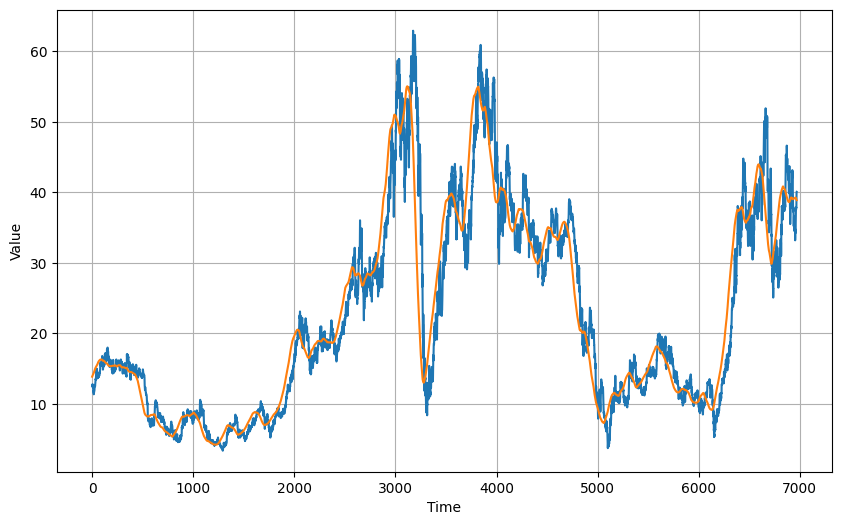

In [33]:
# Menggunakan indeks pada sumbu x
time_indices = np.arange(len(forecast))

# Memplot hasilnya
plot_series(time_indices, (close[:len(forecast)], forecast))

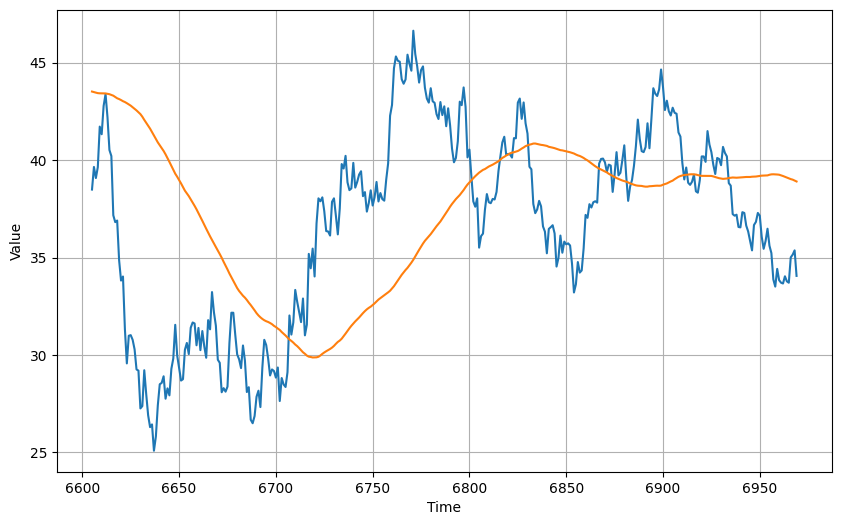

In [34]:
# Menggunakan indeks pada sumbu x
time_indices = np.arange(len(forecast))

# Memplot hasilnya dengan rentang waktu satu tahun terakhir
plot_series(time_indices[-365:], (close[-365:], forecast[-365:]))

Pemodelan prediktive menggunakan neural network

In [41]:
# Ambil kolom 'Date' dan 'Close' dari DataFrame
dates = df['Date'].tolist()
close_prices = df['Close'].tolist()

split

In [42]:
# Define the split time
split_time = int(0.8 * len(dates))  # Menggunakan 80% dari total data untuk pelatihan

# Get the train set
time_train = dates[:split_time]
x_train = close_prices[:split_time]

# Get the validation set
time_valid = dates[split_time:]
x_valid = close_prices[split_time:]

preparasi feature dan label

In [43]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Create tuples with features and labels
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Shuffle the windows
    dataset = dataset.shuffle(shuffle_buffer)

    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    return dataset

In [44]:
# Parameters
window_size = 30
batch_size = 32
shuffle_buffer_size = 1000

# Generate the dataset windows
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

build model

In [45]:
# Build the Model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=64, kernel_size=3,
                      strides=1,
                      activation="relu",
                      padding='causal',
                      input_shape=[window_size, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

 # Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 30, 64)            256       
                                                                 
 lstm_2 (LSTM)               (None, 30, 64)            33024     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_3 (Dense)             (None, 30)                1950      
                                                                 
 dense_4 (Dense)             (None, 10)                310       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
 lambda_1 (Lambda)           (None, 1)                

fine tune lr

In [46]:
# Get initial weights
init_weights = model.get_weights()

In [47]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

# Initialize the optimizer
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer)

# Train the model
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
176/176 [==============================] - 14s 9ms/step - loss: 21.0249 - lr: 1.0000e-08
Epoch 2/100
176/176 [==============================] - 2s 9ms/step - loss: 5.5125 - lr: 1.1220e-08
Epoch 3/100
176/176 [==============================] - 2s 10ms/step - loss: 2.9190 - lr: 1.2589e-08
Epoch 4/100
176/176 [==============================] - 2s 13ms/step - loss: 1.9250 - lr: 1.4125e-08
Epoch 5/100
176/176 [==============================] - 2s 10ms/step - loss: 1.4301 - lr: 1.5849e-08
Epoch 6/100
176/176 [==============================] - 2s 10ms/step - loss: 1.1307 - lr: 1.7783e-08
Epoch 7/100
176/176 [==============================] - 2s 10ms/step - loss: 0.9356 - lr: 1.9953e-08
Epoch 8/100
176/176 [==============================] - 2s 9ms/step - loss: 0.8341 - lr: 2.2387e-08
Epoch 9/100
176/176 [==============================] - 2s 10ms/step - loss: 0.7788 - lr: 2.5119e-08
Epoch 10/100
176/176 [==============================] - 2s 12ms/step - loss: 0.7421 - lr: 2.8184e-08


(1e-08, 0.001, 0.0, 100.0)

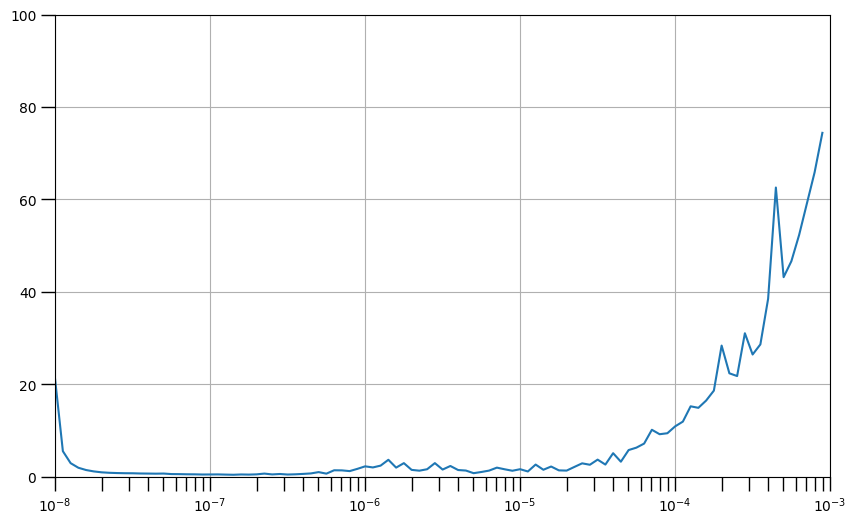

In [48]:
# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(100) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-8, 1e-3, 0, 100])

train model

In [49]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model.set_weights(init_weights)

In [50]:
# Set the learning rate
learning_rate = 8e-7

# Set the optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [51]:
# Train the model
history = model.fit(train_set,epochs=100)

Epoch 1/100
176/176 [==============================] - 6s 14ms/step - loss: 3.9107 - mae: 4.3775
Epoch 2/100
176/176 [==============================] - 2s 10ms/step - loss: 0.9664 - mae: 1.3844
Epoch 3/100
176/176 [==============================] - 2s 10ms/step - loss: 0.6851 - mae: 1.0715
Epoch 4/100
176/176 [==============================] - 2s 10ms/step - loss: 0.5682 - mae: 0.9333
Epoch 5/100
176/176 [==============================] - 2s 10ms/step - loss: 0.5186 - mae: 0.8742
Epoch 6/100
176/176 [==============================] - 2s 12ms/step - loss: 0.5276 - mae: 0.8931
Epoch 7/100
176/176 [==============================] - 2s 10ms/step - loss: 0.5970 - mae: 0.9623
Epoch 8/100
176/176 [==============================] - 2s 10ms/step - loss: 0.4937 - mae: 0.8599
Epoch 9/100
176/176 [==============================] - 2s 10ms/step - loss: 0.5566 - mae: 0.9269
Epoch 10/100
176/176 [==============================] - 2s 10ms/step - loss: 0.5027 - mae: 0.8588
Epoch 11/100
176/176 [=======

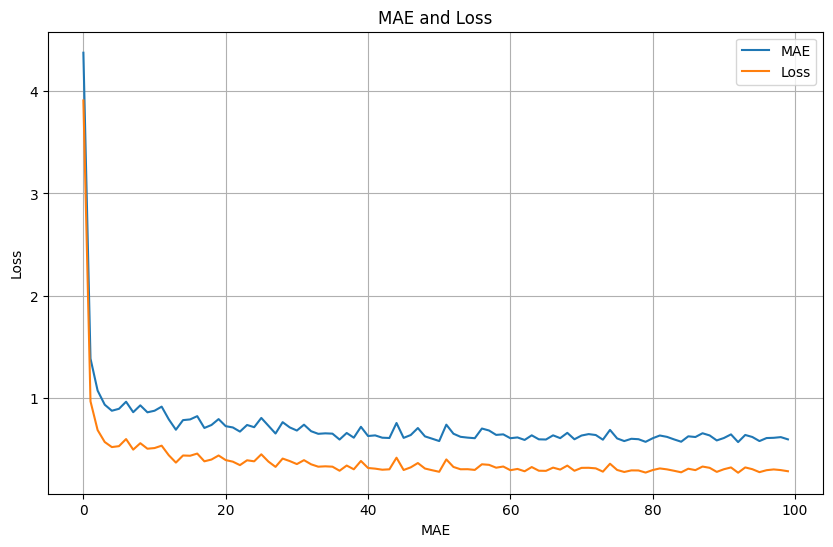

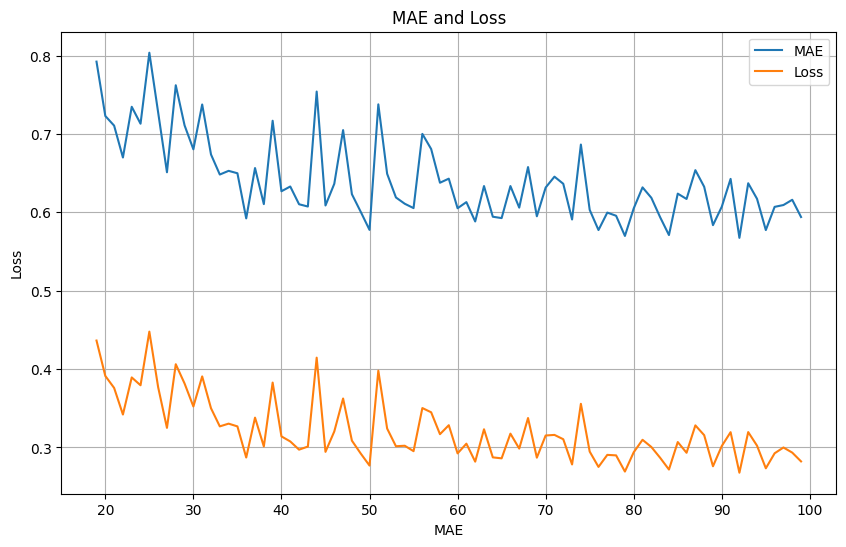

In [54]:
# Get mae and loss from history log
mae=history.history['mae']
loss=history.history['loss']

# Get number of epochs
epochs=range(len(loss))

# Plot mae and loss
plot_series(
    x=epochs,
    y=(mae, loss),
    title='MAE and Loss',
    xlabel='MAE',
    ylabel='Loss',
    legend=['MAE', 'Loss']
    )

# Only plot the last 80% of the epochs
zoom_split = int(epochs[-1] * 0.2)
epochs_zoom = epochs[zoom_split:]
mae_zoom = mae[zoom_split:]
loss_zoom = loss[zoom_split:]

# Plot zoomed mae and loss
plot_series(
    x=epochs_zoom,
    y=(mae_zoom, loss_zoom),
    title='MAE and Loss',
    xlabel='MAE',
    ylabel='Loss',
    legend=['MAE', 'Loss']
    )

In [57]:
model.save("nama_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


prediksi

In [55]:
def model_forecast(model, series, window_size, batch_size):

    # Generate a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take those with the specified size
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements in a single batch
    dataset = dataset.flat_map(lambda w: w.batch(window_size))

    # Create batches of windows
    dataset = dataset.batch(batch_size).prefetch(1)

    # Get predictions on the entire dataset
    forecast = model.predict(dataset)

    return forecast

45/45 [==============================] - 1s 6ms/step


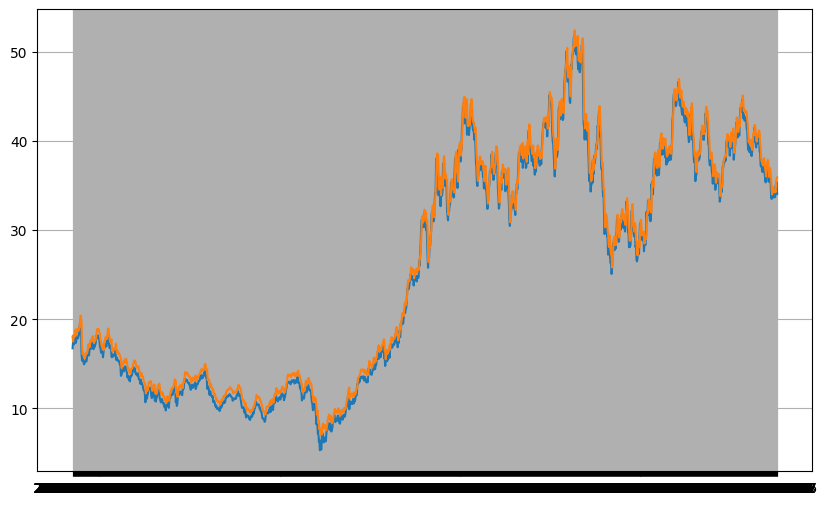

In [56]:
# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model, forecast_series, window_size, batch_size)

# Drop single dimensional axis
results = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results))